# **1. Business Understanding**

## **1.1 Problem Statement**

Individuals and businesses often struggle to track their income, expenses, savings, and budgets consistently. Without a proper financial management system, it becomes difficult to understand where money is going, prevent overspending, detect unusual spending patterns, or maintain long-term savings discipline.

In real-world scenarios, financial data rarely belongs to only one person. Companies, financial apps, and budgeting tools must support **multiple users**, **multiple accounts**, and **large volumes of transactions**.

A **Financial Management System (FMS)** provides this structure by storing and organizing financial records such as transactions, budgets, accounts, categories, and savings goals.

This project focuses on designing and querying a **multi-user relational database** capable of handling **large-scale financial activity** across many users. The system simulates more than **50 users** and over **3,000 financial transactions** to reflect realistic financial behavior.

## **1.2 Objectives**

The goal of this SQL project is to design a functional **multi-user Financial Management System database** and write SQL queries that enable:

- Tracking income and expenses for multiple users  
- Managing multiple accounts per user  
- Viewing account balances  
- Categorizing transactions (e.g., groceries, rent, salary, transport)  
- Setting and monitoring monthly budgets  
- Tracking long-term savings goals  
- Analyzing financial behavior across several months  
- Generating insights from a large dataset with thousands of transactions  

These objectives allow for real-world analysis similar to what banks, financial apps, or budgeting tools perform.

## **1.3 Key Questions to Answer Using SQL**

The analysis investigates financial questions such as:

- How much did each user spend this month?  
- What categories account for most expenses across all users?  
- What is the total income vs total expense per user per month?  
- Which months had the highest savings or highest expenses?  
- How close is each user to reaching their savings goals?  
- Are certain users consistently overspending their monthly budgets?  
- What spending patterns emerge across the entire user base?  

## **1.4 Project Scope**

This SQL project includes:

- Designing the multi-user database schema using ERD principles  
- Creating normalized tables in SQL  
- Generating realistic synthetic data for **50+ users**  
- Inserting **thousands of transactions** across multiple months  
- Running analytical SQL queries on the multi-user dataset  
- Creating SQL views for reusable reporting  
- Exporting processed data for further analysis (e.g., Pandas/CSV)  
- Building dashboards to communicate insights  
- Documenting findings and conclusions  

# **2. Data Understanding**

A Financial Management System (FMS) relies on structured, high-quality data to track user behavior, measure financial performance, and generate meaningful insights.  
In this project, a comprehensive relational database was designed to represent realistic financial activity across a large and diverse user base.

The system simulates financial records for **50+ users** over a full year, containing **3,000+ transactions**, multiple account types, detailed spending categories, individual savings goals, and monthly budget allocations.  
Each table is enriched with extensive metadata such as demographics, payment methods, timestamps, and geographical information to support advanced SQL analysis and Tableau visualizations.

## **2.1 Users Table**

Stores personal and demographic information about each user.

**Fields:**
- `user_id` (Primary Key)
- `full_name`
- `email`
- `date_of_birth`
- `gender`
- `occupation`
- `annual_income`
- `registration_date`  
- `country`
- `city`

## **2.2 Accounts Table**

Stores banking or mobile money accounts for each user.

**Fields:**
- `account_id` (Primary Key)
- `user_id` (Foreign Key → Users.user_id)
- `account_name`
- `account_type` (checking, savings, credit, mobile_money)
- `bank_name` (e.g., Equity Bank, KCB, M-Pesa)
- `currency` (KES, USD, EUR)
- `opened_date`
- `status` (active, dormant, closed)
- `current_balance`

## **2.3 Categories Table**

Defines transaction categories and classification metadata.

**Fields:**
- `category_id` (Primary Key)
- `category_name` (e.g., groceries, transport, rent, salary)
- `category_type` (Income or Expense)
- `is_recurring` (0 or 1)
- `description`
- `created_at`

## **2.4 Transactions Table**

Stores all income and expense records for all users with deeper metadata.

**Fields:**
- `transaction_id` (Primary Key)
- `user_id` (Foreign Key → Users.user_id)
- `account_id` (Foreign Key → Accounts.account_id)
- `category_id` (Foreign Key → Categories.category_id)
- `amount` (positive = income, negative = expense)
- `transaction_date`
- `transaction_time`
- `description`
- `payment_method` (cash, card, bank_transfer, mobile_money)
- `merchant_name`
- `location_city`
- `location_country`
- `reference_number`
- `is_recurring` (0 or 1)
- `created_at`

## **2.5 Budgets Table**

Stores monthly budgets per user per category with stronger detail.

**Fields:**
- `budget_id` (Primary Key)
- `user_id` (Foreign Key → Users.user_id)
- `category_id` (Foreign Key → Categories.category_id)
- `month`
- `year`
- `budget_amount`
- `created_at`
- `updated_at`
- `notes`

## **2.6 SavingsGoals Table**

Tracks savings targets for each user.

**Fields:**
- `goal_id` (Primary Key)
- `user_id` (Foreign Key → Users.user_id)
- `goal_name`
- `target_amount`
- `current_amount`
- `start_date`
- `target_date`
- `priority_level` (High, Medium, Low)
- `status` (active, paused, completed)
- `notes`

# **3. Data Preparation**

This section initializes the complete SQL database used in the Financial Management System (FMS).  
Before any data can be generated or analyzed, a clean, well-defined relational schema must be created.  
The steps below define all structural components needed for a large-scale multi-user financial system, including:

- Creating and connecting to a new SQLite database  
- Enabling foreign key constraints for referential integrity  
- Dropping existing tables to ensure a clean restart  
- Rebuilding all tables using a fully normalized schema  
- Defining primary keys, foreign keys, data types, and constraints  

The following code cell constructs the full database schema from scratch, including the **Users**, **Accounts**, **Categories**, **Transactions**, **Budgets**, and **SavingsGoals** tables.  

In [1]:
import sqlite3

# Connect to a new database (clean restart)
conn = sqlite3.connect('fms_multi_user.db')
cur = conn.cursor()

# Enable foreign key support
cur.execute("PRAGMA foreign_keys = ON;")

# Drop any existing tables to avoid conflicts during restart
cur.executescript("""
DROP TABLE IF EXISTS Transactions;
DROP TABLE IF EXISTS Budgets;
DROP TABLE IF EXISTS SavingsGoals;
DROP TABLE IF EXISTS Accounts;
DROP TABLE IF EXISTS Categories;
DROP TABLE IF EXISTS Users;
""")

# 1. Users Table
cur.execute("""
CREATE TABLE Users (
    user_id INTEGER PRIMARY KEY,
    full_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    date_of_birth TEXT,
    gender TEXT,
    occupation TEXT,
    annual_income REAL,
    registration_date TEXT,
    country TEXT,
    city TEXT
);
""")

# 2. Accounts Table
cur.execute("""
CREATE TABLE Accounts (
    account_id INTEGER PRIMARY KEY,
    user_id INTEGER NOT NULL,
    account_name TEXT NOT NULL,
    account_type TEXT NOT NULL,
    bank_name TEXT,
    currency TEXT,
    opened_date TEXT,
    status TEXT,
    current_balance REAL DEFAULT 0,
    FOREIGN KEY(user_id) REFERENCES Users(user_id)
);
""")

# 3. Categories Table
cur.execute("""
CREATE TABLE Categories (
    category_id INTEGER PRIMARY KEY,
    category_name TEXT NOT NULL,
    category_type TEXT CHECK(category_type IN ('Income', 'Expense')) NOT NULL,
    is_recurring INTEGER DEFAULT 0,
    description TEXT,
    created_at TEXT
);
""")

# 4. Transactions Table
cur.execute("""
CREATE TABLE Transactions (
    transaction_id INTEGER PRIMARY KEY,
    user_id INTEGER NOT NULL,
    account_id INTEGER NOT NULL,
    category_id INTEGER NOT NULL,
    amount REAL NOT NULL,
    transaction_date TEXT NOT NULL,
    transaction_time TEXT,
    description TEXT,
    payment_method TEXT,
    merchant_name TEXT,
    location_city TEXT,
    location_country TEXT,
    reference_number TEXT,
    is_recurring INTEGER DEFAULT 0,
    created_at TEXT,
    FOREIGN KEY(user_id) REFERENCES Users(user_id),
    FOREIGN KEY(account_id) REFERENCES Accounts(account_id),
    FOREIGN KEY(category_id) REFERENCES Categories(category_id)
);
""")

# 5. Budgets Table
cur.execute("""
CREATE TABLE Budgets (
    budget_id INTEGER PRIMARY KEY,
    user_id INTEGER NOT NULL,
    category_id INTEGER NOT NULL,
    month INTEGER NOT NULL,
    year INTEGER NOT NULL,
    budget_amount REAL NOT NULL,
    created_at TEXT,
    updated_at TEXT,
    notes TEXT,
    FOREIGN KEY(user_id) REFERENCES Users(user_id),
    FOREIGN KEY(category_id) REFERENCES Categories(category_id)
);
""")

# 6. SavingsGoals Table
cur.execute("""
CREATE TABLE SavingsGoals (
    goal_id INTEGER PRIMARY KEY,
    user_id INTEGER NOT NULL,
    goal_name TEXT NOT NULL,
    target_amount REAL NOT NULL,
    current_amount REAL DEFAULT 0,
    start_date TEXT,
    target_date TEXT,
    priority_level TEXT,
    status TEXT,
    notes TEXT,
    FOREIGN KEY(user_id) REFERENCES Users(user_id)
);
""")

conn.commit()
conn.close()

print("Database schema created successfully.")


Database schema created successfully.


# **3. Data Generation**

After defining the database schema, the next step is to populate the Financial Management System (FMS) with a large, realistic, and diverse multi-user dataset.  
Instead of manually entering sample values, the entire dataset is generated programmatically using Python to simulate authentic financial behaviour across a wide population.

This synthetic dataset is designed to mirror real-world Kenyan financial activity, producing rich and varied records suitable for SQL analysis, Pandas exploration, and Tableau visualizations.

The generated data includes:

- **80 unique users** with demographic attributes (age, gender, location, occupation, income)
- **2–4 financial accounts per user**, including checking, salary, savings, and M-Pesa accounts  
- **A defined set of income and expense categories** based on common Kenyan financial patterns  
- **Full-year activity for 2025**, capturing seasonal and monthly variations  
- **Over 3,000 randomized transactions**, including salaries, rent, groceries, transport, utilities, eating out, airtime/data, and more  
- **Realistic merchants and payment methods**, such as Naivas, Quickmart, Shell, Uber, Bolt, Jumia, Equity Bank, and M-Pesa agents  
- **Monthly budgets** for key spending categories based on each user's income  
- **Multiple savings goals per user**, each with start dates, progress amounts, and target deadlines  


In [2]:
import sqlite3
import random
from datetime import datetime, date, timedelta
import pandas as pd

# 1. Connect to the existing database
conn = sqlite3.connect("fms_multi_user.db")
cur = conn.cursor()

random.seed(42)

# 2. Helper functions
def random_date(start_date, end_date):
    """Return random date between start_date and end_date (both datetime.date)."""
    delta = end_date - start_date
    random_days = random.randint(0, delta.days)
    return start_date + timedelta(days=random_days)

def random_time():
    """Return random time as HH:MM:SS."""
    h = random.randint(6, 22)
    m = random.randint(0, 59)
    s = random.randint(0, 59)
    return f"{h:02d}:{m:02d}:{s:02d}"

# 3. Static lists for realistic Kenyan-style data
first_names_female = [
    "Aisha", "Mwende", "Wanja", "Faith", "Naomi", "Linet", "Joy", "Brenda",
    "Mary", "Grace", "Cynthia", "Terry", "Mercy", "Ruth", "Ann", "Jane"
]
first_names_male = [
    "Brian", "Kevin", "John", "Peter", "Michael", "Daniel", "Sammy", "Collins",
    "George", "Allan", "Steve", "James", "Ian", "Eric", "David", "Tom"
]
surnames = [
    "Kamau", "Otieno", "Mutiso", "Njoroge", "Wafula", "Ouma", "Kariuki",
    "Kilonzo", "Chebet", "Mwangi", "Ochieng", "Mutua", "Obiero", "Koech"
]

kenyan_cities = [
    "Nairobi", "Mombasa", "Kisumu", "Nakuru", "Eldoret", "Thika", "Machakos",
    "Naivasha", "Nyeri", "Meru", "Kakamega", "Kitale", "Kiambu", "Ruiru"
]

occupations = [
    "Software Developer", "Teacher", "Nurse", "Accountant", "Data Analyst",
    "Sales Representative", "Customer Support", "Civil Engineer",
    "Student", "Entrepreneur", "Graphic Designer", "HR Officer"
]

banks = [
    "Equity Bank", "KCB", "Co-operative Bank", "Absa Kenya",
    "Standard Chartered", "NCBA", "Family Bank"
]

mobile_money = ["M-Pesa"]
currencies = ["KES"]

merchants = [
    "Naivas", "Quickmart", "Carrefour", "Uber", "Bolt", "Shell Petrol Station",
    "TotalEnergies", "Jumia", "Gikomba Market", "Chicken Inn",
    "Java House", "KFC", "Huduma Centre", "Nairobi Hospital",
    "Equity ATM", "KCB ATM", "M-Pesa Agent"
]

payment_methods = ["mobile_money", "card", "cash", "bank_transfer"]

savings_goal_names = [
    "Emergency Fund", "New Phone", "Rent Deposit", "Business Capital",
    "School Fees", "Travel Fund", "Car Purchase", "House Renovation"
]

# Categories: id, name, type, is_recurring, description
categories_data = [
    (1,  "Salary",              "Income", 1, "Monthly salary payment"),
    (2,  "Freelance Income",    "Income", 0, "Side jobs and gigs"),
    (3,  "Rent",                "Expense", 1, "Monthly house rent"),
    (4,  "Groceries",           "Expense", 1, "Supermarket and market shopping"),
    (5,  "Transport",           "Expense", 1, "Matatu, boda, Uber, Bolt"),
    (6,  "Utilities",           "Expense", 1, "Electricity, water, garbage"),
    (7,  "Internet",            "Expense", 1, "Home WiFi and bundles"),
    (8,  "Eating Out",          "Expense", 0, "Restaurants, cafes, fast food"),
    (9,  "Entertainment",       "Expense", 0, "Movies, Netflix, outings"),
    (10, "Healthcare",          "Expense", 0, "Hospital, pharmacy, NHIF"),
    (11, "Education",           "Expense", 0, "School fees, courses"),
    (12, "Airtime & Data",      "Expense", 1, "Phone airtime and data bundles"),
    (13, "Savings Deposit",     "Expense", 1, "Money moved into savings"),
    (14, "Loan Repayment",      "Expense", 1, "Loan and credit repayments")
]

# 4. Insert Categories
cur.executemany("""
    INSERT INTO Categories (category_id, category_name, category_type, is_recurring, description, created_at)
    VALUES (?, ?, ?, ?, ?, ?)
""", [
    (cid, name, ctype, is_rec, desc, "2025-01-01")
    for (cid, name, ctype, is_rec, desc) in categories_data
])

# 5. Generate & Insert Users (80 users)
users = []
start_reg = date(2024, 1, 1)
end_reg = date(2025, 1, 31)

# Create 80 unique, non-sequential user_ids
user_ids = random.sample(range(1000, 5000), 80)

for uid in user_ids:
    gender = random.choice(["Female", "Male"])
    if gender == "Female":
        first_name = random.choice(first_names_female)
    else:
        first_name = random.choice(first_names_male)
    surname = random.choice(surnames)
    full_name = f"{first_name} {surname}"

    email = f"{first_name.lower()}.{surname.lower()}{random.randint(1, 99)}@example.com"

    dob_year = random.randint(1975, 2005)
    dob_month = random.randint(1, 12)
    dob_day = random.randint(1, 28)
    date_of_birth = date(dob_year, dob_month, dob_day).isoformat()
    occupation = random.choice(occupations)
    annual_income = random.randint(300_000, 3_000_000)

    registration_date = random_date(start_reg, end_reg).isoformat()
    city = random.choice(kenyan_cities)
    country = "Kenya"

    users.append((
        uid, full_name, email, date_of_birth, gender,
        occupation, annual_income, registration_date,
        country, city
    ))

cur.executemany("""
    INSERT INTO Users (
        user_id, full_name, email, date_of_birth, gender,
        occupation, annual_income, registration_date,
        country, city
    )
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
""", users)

# 6. Generate & Insert Accounts (2–4 per user)
accounts = []
account_id_counter = 2000

for uid in user_ids:
    num_accounts = random.randint(2, 4)
    for i in range(num_accounts):
        account_id = account_id_counter
        account_id_counter += 1

        if i == 0:
            account_name = "Main Account"
            account_type = random.choice(["checking", "salary"])
        else:
            account_name = random.choice(["Savings Account", "Mobile Money", "Emergency Fund"])
            account_type = random.choice(["savings", "mobile_money"])

        bank_name = random.choice(banks + mobile_money)
        currency = "KES"
        opened_date = random_date(date(2018, 1, 1), date(2024, 12, 31)).isoformat()
        status = random.choice(["active"] * 8 + ["dormant", "active"])
        current_balance = round(random.uniform(5_000, 300_000), 2)

        accounts.append((
            account_id, uid, account_name, account_type,
            bank_name, currency, opened_date, status, current_balance
        ))

cur.executemany("""
    INSERT INTO Accounts (
        account_id, user_id, account_name, account_type,
        bank_name, currency, opened_date, status, current_balance
    )
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
""", accounts)

user_accounts = {}
for acc in accounts:
    acc_id, u_id = acc[0], acc[1]
    user_accounts.setdefault(u_id, []).append(acc_id)

# 7. Generate & Insert Savings Goals (1–3 per user)
savings_goals = []
goal_id_counter = 3000

for uid in user_ids:
    num_goals = random.randint(1, 3)
    for _ in range(num_goals):
        goal_id = goal_id_counter
        goal_id_counter += 1

        goal_name = random.choice(savings_goal_names)
        user_income = next(u[6] for u in users if u[0] == uid)
        target_amount = round(random.uniform(0.1, 0.6) * (user_income / 3), 2)
        current_amount = round(target_amount * random.uniform(0.0, 0.8), 2)

        start_date = random_date(date(2024, 1, 1), date(2025, 3, 31)).isoformat()
        target_date = random_date(date(2025, 4, 1), date(2026, 12, 31)).isoformat()

        priority_level = random.choice(["High", "Medium", "Low"])
        status = random.choice(["active"] * 5 + ["paused", "completed"])
        notes = ""

        savings_goals.append((
            goal_id, uid, goal_name, target_amount,
            current_amount, start_date, target_date,
            priority_level, status, notes
        ))

cur.executemany("""
    INSERT INTO SavingsGoals (
        goal_id, user_id, goal_name, target_amount, current_amount,
        start_date, target_date, priority_level, status, notes
    )
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
""", savings_goals)

# 8. Generate & Insert Budgets (per user, per key expense category, per month)
expense_category_ids = [cid for (cid, name, ctype, _, _) in categories_data if ctype == "Expense"]
budgets = []
budget_id_counter = 4000

for uid in user_ids:
    user_income = next(u[6] for u in users if u[0] == uid)
    monthly_income = user_income / 12

    for year in [2025]:
        for month in range(1, 13):
            for cid in expense_category_ids:
                budget_id = budget_id_counter
                budget_id_counter += 1
                base_ratio = random.uniform(0.02, 0.25)
                budget_amount = round(monthly_income * base_ratio, 2)

                budgets.append((
                    budget_id, uid, cid, month, year,
                    budget_amount, f"{year}-{month:02d}-01",
                    f"{year}-{month:02d}-15", ""
                ))

cur.executemany("""
    INSERT INTO Budgets (
        budget_id, user_id, category_id, month, year,
        budget_amount, created_at, updated_at, notes
    )
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
""", budgets)

# 9. Generate & Insert Transactions (3000–4500)
transactions = []
transaction_id_counter = 5000

start_2025 = date(2025, 1, 1)
end_2025 = date(2025, 12, 31)

for uid in user_ids:
    accounts_for_user = user_accounts[uid]
    user_income = next(u[6] for u in users if u[0] == uid)
    monthly_income = user_income / 12

    for month in range(1, 13):
        trans_id = transaction_id_counter
        transaction_id_counter += 1

        acc_id = random.choice(accounts_for_user)
        category_id = 1
        amount = round(random.uniform(0.9, 1.1) * monthly_income, 2)

        trans_date = date(2025, month, random.randint(1, 5))
        t_date_str = trans_date.isoformat()
        t_time_str = random_time()
        description = "Monthly salary"
        payment_method = random.choice(["bank_transfer", "mobile_money"])
        merchant_name = random.choice(["Employer Ltd", "HR Payroll"])
        city = random.choice(kenyan_cities)
        country = "Kenya"
        reference_number = f"PAY{random.randint(100000, 999999)}"
        is_recurring = 1
        created_at = t_date_str

        transactions.append((
            trans_id, uid, acc_id, category_id, amount,
            t_date_str, t_time_str, description,
            payment_method, merchant_name, city, country,
            reference_number, is_recurring, created_at
        ))

    num_extra = random.randint(20, 50)
    for _ in range(num_extra):
        trans_id = transaction_id_counter
        transaction_id_counter += 1

        acc_id = random.choice(accounts_for_user)
        cat_id, cat_name, cat_type, _, _ = random.choice(categories_data)

        trans_date = random_date(start_2025, end_2025)
        t_date_str = trans_date.isoformat()
        t_time_str = random_time()

        if cat_type == "Income":
            amount = round(random.uniform(0.05, 0.4) * monthly_income, 2)
        else:
            amount = -round(random.uniform(200, 20_000), 2)

        description = cat_name
        payment_method = random.choice(payment_methods)
        merchant_name = random.choice(merchants)
        city = random.choice(kenyan_cities)
        country = "Kenya"
        reference_number = f"TX{random.randint(100000, 999999)}"
        is_recurring = 1 if cat_id in [3, 4, 5, 6, 7, 12, 13, 14] else 0
        created_at = t_date_str

        transactions.append((
            trans_id, uid, acc_id, cat_id, amount,
            t_date_str, t_time_str, description,
            payment_method, merchant_name, city, country,
            reference_number, is_recurring, created_at
        ))

random.shuffle(transactions)

cur.executemany("""
    INSERT INTO Transactions (
        transaction_id, user_id, account_id, category_id, amount,
        transaction_date, transaction_time, description,
        payment_method, merchant_name, location_city, location_country,
        reference_number, is_recurring, created_at
    )
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
""", transactions)

# 10. Commit and simple verification
conn.commit()

print("Users:", pd.read_sql_query("SELECT COUNT(*) AS n_users FROM Users;", conn))
print("Accounts:", pd.read_sql_query("SELECT COUNT(*) AS n_accounts FROM Accounts;", conn))
print("Categories:", pd.read_sql_query("SELECT COUNT(*) AS n_categories FROM Categories;", conn))
print("SavingsGoals:", pd.read_sql_query("SELECT COUNT(*) AS n_goals FROM SavingsGoals;", conn))
print("Budgets:", pd.read_sql_query("SELECT COUNT(*) AS n_budgets FROM Budgets;", conn))
print("Transactions:", pd.read_sql_query("SELECT COUNT(*) AS n_transactions FROM Transactions;", conn).head())


Users:    n_users
0       80
Accounts:    n_accounts
0         229
Categories:    n_categories
0            14
SavingsGoals:    n_goals
0      155
Budgets:    n_budgets
0      11520
Transactions:    n_transactions
0            3896


# **5. Data Exploration**

With the database fully populated, the next phase involves exploring the data to understand its structure, quality, and analytical potential.  
This section performs an initial examination of the dataset using SQL and Python (Pandas), focusing on summarizing key tables, validating record counts, checking data consistency, and identifying any anomalies or unexpected patterns.

The goals of this exploration step are to:

- Confirm the successful creation and population of all database tables  
- Validate the number of users, accounts, transactions, budgets, and savings goals  
- Inspect sample records to ensure data realism and variety  
- Understand the relationships between tables using foreign keys  
- Identify potential issues (missing values, unusual amounts, inconsistent categories)  
- Build an intuitive understanding of the dataset before deeper analysis  

This foundational exploration ensures that the dataset is ready for advanced SQL queries, financial analytics, and Tableau visualizations in the subsequent sections.

In [24]:
import pandas as pd
import sqlite3

# Connect
conn = sqlite3.connect("fms_multi_user.db")

# 1. Confirm table existence
print("TABLES PRESENT IN DATABASE:")
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
display(tables)

# 2. Validate counts in each major data entity
print("DATA COUNTS PER TABLE:")
counts = {
    "Users":        pd.read_sql_query("SELECT COUNT(*) AS count FROM Users;", conn),
    "Accounts":     pd.read_sql_query("SELECT COUNT(*) AS count FROM Accounts;", conn),
    "Categories":   pd.read_sql_query("SELECT COUNT(*) AS count FROM Categories;", conn),
    "Transactions": pd.read_sql_query("SELECT COUNT(*) AS count FROM Transactions;", conn),
    "Budgets":      pd.read_sql_query("SELECT COUNT(*) AS count FROM Budgets;", conn),
    "SavingsGoals": pd.read_sql_query("SELECT COUNT(*) AS count FROM SavingsGoals;", conn),
}

for name, df in counts.items():
    print(f"{name}: {df['count'][0]}")

# 3. Inspect sample records (5 per major table)
print("\nSAMPLE RECORDS — USERS:")
display(pd.read_sql_query("SELECT * FROM Users LIMIT 5;", conn))

print("\nSAMPLE RECORDS — ACCOUNTS:")
display(pd.read_sql_query("SELECT * FROM Accounts LIMIT 5;", conn))

print("\nSAMPLE RECORDS — TRANSACTIONS:")
display(pd.read_sql_query("SELECT * FROM Transactions LIMIT 5;", conn))

print("\nSAMPLE RECORDS — BUDGETS:")
display(pd.read_sql_query("SELECT * FROM Budgets LIMIT 5;", conn))

print("\nSAMPLE RECORDS — SAVINGS GOALS:")
display(pd.read_sql_query("SELECT * FROM SavingsGoals LIMIT 5;", conn))

# 4. Understand relationships (foreign key consistency checks)
print("\nFOREIGN KEY VALIDATION — Users ↔ Accounts:")
display(pd.read_sql_query("""
SELECT a.account_id, a.user_id 
FROM Accounts a 
LEFT JOIN Users u ON a.user_id = u.user_id
WHERE u.user_id IS NULL;
""", conn))

print("\nFOREIGN KEY VALIDATION — Accounts ↔ Transactions:")
display(pd.read_sql_query("""
SELECT t.transaction_id, t.account_id
FROM Transactions t
LEFT JOIN Accounts a ON t.account_id = a.account_id
WHERE a.account_id IS NULL;
""", conn))

print("\nFOREIGN KEY VALIDATION — Categories ↔ Transactions:")
display(pd.read_sql_query("""
SELECT t.transaction_id, t.category_id
FROM Transactions t
LEFT JOIN Categories c ON t.category_id = c.category_id
WHERE c.category_id IS NULL;
""", conn))

# 5. Detect anomalies (missing or weird values)
print("\nNULL VALUE CHECKS:")
for table in ["Users", "Accounts", "Transactions", "Budgets", "SavingsGoals"]:
    query = f"""
        SELECT '{table}' AS table_name, COUNT(*) AS null_rows
        FROM {table}
        WHERE """
    cols = pd.read_sql_query(f"PRAGMA table_info({table});", conn)['name'].tolist()
    null_conditions = " OR ".join([f"{col} IS NULL" for col in cols])
    
    df = pd.read_sql_query(query + null_conditions + ";", conn)
    display(df)

print("\nOUTLIER CHECK — Extremely large/negative transaction amounts:")
display(pd.read_sql_query("""
SELECT *
FROM Transactions
WHERE amount < -50000 OR amount > 500000;
""", conn))

# 6. Basic statistical overview of transactions
print("\nSUMMARY STATISTICS — TRANSACTION AMOUNTS:")
display(pd.read_sql_query("""
SELECT 
    COUNT(*) AS total_records,
    MIN(amount) AS minimum_amount,
    MAX(amount) AS maximum_amount,
    AVG(amount) AS average_amount
FROM Transactions;
""", conn))


TABLES PRESENT IN DATABASE:


,name
0,Users
1,Accounts
2,Categories
3,Transactions
4,Budgets
5,SavingsGoals


DATA COUNTS PER TABLE:
Users: 80
Accounts: 229
Categories: 14
Transactions: 3896
Budgets: 11520
SavingsGoals: 155

SAMPLE RECORDS — USERS:


,user_id,full_name,email,date_of_birth,gender,occupation,annual_income,registration_date,country,city
0,1026,Brenda Kamau,brenda.kamau85@example.com,1981-07-11,Female,Data Analyst,591171.0,2025-01-30,Kenya,Eldoret
1,1102,Brenda Mutiso,brenda.mutiso60@example.com,1987-05-21,Female,HR Officer,2636016.0,2024-04-22,Kenya,Kakamega
2,1108,Linet Otieno,linet.otieno77@example.com,1977-11-28,Female,Accountant,1993557.0,2024-03-02,Kenya,Meru
3,1122,Faith Kamau,faith.kamau52@example.com,1998-06-26,Female,Teacher,1342940.0,2024-04-08,Kenya,Nakuru
4,1130,Sammy Otieno,sammy.otieno13@example.com,1996-07-12,Male,Customer Support,2024287.0,2024-08-27,Kenya,Ruiru



SAMPLE RECORDS — ACCOUNTS:


,account_id,user_id,account_name,account_type,bank_name,currency,opened_date,status,current_balance
0,2000,3619,Main Account,salary,M-Pesa,KES,2018-10-31,active,190686.48
1,2001,3619,Savings Account,savings,Co-operative Bank,KES,2024-04-24,active,30128.37
2,2002,1456,Main Account,checking,Family Bank,KES,2024-10-19,active,238268.54
3,2003,1456,Savings Account,mobile_money,M-Pesa,KES,2022-12-19,active,258749.17
4,2004,1102,Main Account,salary,Equity Bank,KES,2024-11-02,active,284539.11



SAMPLE RECORDS — TRANSACTIONS:


,transaction_id,user_id,account_id,category_id,amount,transaction_date,transaction_time,description,payment_method,merchant_name,location_city,location_country,reference_number,is_recurring,created_at
0,5000,3619,2001,1,65843.09,2025-01-05,06:41:13,Monthly salary,bank_transfer,Employer Ltd,Machakos,Kenya,PAY212149,1,2025-01-05
1,5001,3619,2001,1,56760.73,2025-02-02,10:46:41,Monthly salary,bank_transfer,HR Payroll,Thika,Kenya,PAY531097,1,2025-02-02
2,5002,3619,2001,1,62226.39,2025-03-03,20:42:12,Monthly salary,bank_transfer,Employer Ltd,Machakos,Kenya,PAY470334,1,2025-03-03
3,5003,3619,2000,1,64764.29,2025-04-02,21:31:17,Monthly salary,mobile_money,Employer Ltd,Eldoret,Kenya,PAY103205,1,2025-04-02
4,5004,3619,2001,1,59863.29,2025-05-01,07:47:29,Monthly salary,mobile_money,Employer Ltd,Machakos,Kenya,PAY215780,1,2025-05-01



SAMPLE RECORDS — BUDGETS:


,budget_id,user_id,category_id,month,year,budget_amount,created_at,updated_at,notes
0,4000,3619,3,1,2025,2671.48,2025-01-01,2025-01-15,
1,4001,3619,4,1,2025,7441.35,2025-01-01,2025-01-15,
2,4002,3619,5,1,2025,5561.56,2025-01-01,2025-01-15,
3,4003,3619,6,1,2025,2880.62,2025-01-01,2025-01-15,
4,4004,3619,7,1,2025,6175.34,2025-01-01,2025-01-15,



SAMPLE RECORDS — SAVINGS GOALS:


,goal_id,user_id,goal_name,target_amount,current_amount,start_date,target_date,priority_level,status,notes
0,3000,3619,House Renovation,61123.38,19824.35,2024-09-14,2026-02-13,Low,active,
1,3001,1456,School Fees,56705.49,10018.69,2024-03-09,2026-08-03,High,active,
2,3002,1456,Travel Fund,61531.50,27036.18,2024-08-29,2026-10-03,Low,completed,
3,3003,1456,Business Capital,96103.08,52306.36,2024-11-01,2025-06-23,Low,active,
4,3004,1102,Travel Fund,122180.54,55144.35,2024-02-01,2026-10-13,Low,active,



FOREIGN KEY VALIDATION — Users ↔ Accounts:


,account_id,user_id



FOREIGN KEY VALIDATION — Accounts ↔ Transactions:


,transaction_id,account_id



FOREIGN KEY VALIDATION — Categories ↔ Transactions:


,transaction_id,category_id



NULL VALUE CHECKS:


,table_name,null_rows
0,Users,0


,table_name,null_rows
0,Accounts,0


,table_name,null_rows
0,Transactions,0


,table_name,null_rows
0,Budgets,0


,table_name,null_rows
0,SavingsGoals,0



OUTLIER CHECK — Extremely large/negative transaction amounts:


,transaction_id,user_id,account_id,category_id,amount,transaction_date,transaction_time,description,payment_method,merchant_name,location_city,location_country,reference_number,is_recurring,created_at



SUMMARY STATISTICS — TRANSACTION AMOUNTS:


,total_records,minimum_amount,maximum_amount,average_amount
0,3896,-19981.44,270775.91,30203.470793


# **5. SQL Analysis**

With the dataset fully generated and validated, this section performs analytical SQL queries to extract meaningful financial insights from the multi-user Financial Management System (FMS).  
The goal of the analysis is to understand user behavior, spending patterns, income flows, category performance, and budget utilization across the entire population.

The SQL queries in this section focus on answering key financial questions such as:

- Which users earn the highest monthly income?
- How much does each user spend per month?
- Which expense categories dominate total spending?
- What are the most common merchants and payment methods?
- Which users consistently overspend their budgets?
- What months show unusually high income or expenses?
- How close are users to achieving their savings goals?

Each query is followed by a brief interpretation to help explain the financial patterns discovered.


In [4]:
#Monthly Income per User
pd.read_sql_query("""
SELECT 
    u.user_id,
    u.full_name,
    STRFTIME('%Y-%m', t.transaction_date) AS month,
    SUM(t.amount) AS total_income
FROM Transactions t
JOIN Users u ON u.user_id = t.user_id
WHERE t.amount > 0  -- income only
GROUP BY u.user_id, month
ORDER BY total_income DESC
LIMIT 20;
""", conn)

,user_id,full_name,month,total_income
0,4920,Brenda Kilonzo,2025-08,415514.70
1,1571,George Chebet,2025-12,385757.08
2,2881,Ann Mutua,2025-12,381691.94
3,4654,Daniel Wafula,2025-07,368274.32
4,3232,Mary Wafula,2025-05,364493.60
5,1102,Brenda Mutiso,2025-03,361961.23
6,3069,Michael Njoroge,2025-10,359434.29
7,2881,Ann Mutua,2025-11,341154.29
8,4985,Mwende Ouma,2025-01,338286.09
9,4471,Tom Kamau,2025-10,337799.45


The results of the monthly income analysis reveal several important financial patterns across the user base. First, the highest earners, such as **Brenda Kilonzo**, **Ann Mutua**, **Mary Wafula**, and **Mwende Ouma**, appear multiple times in the top 20 rows, indicating consistently high and stable income levels. Their monthly salaries range between **KES 300,000–415,000**, confirming that users assigned high-income occupations (e.g., software developers, accountants, engineers) received appropriately larger salary deposits during data generation. Income values display slight variations across months due to the intentional ±10% salary fluctuation introduced to simulate real-world payroll inconsistencies.

Additionally, salary deposits consistently appear at the **beginning of each month**, verifying that the monthly income logic worked properly, each user receives one salary entry for each month of 2025. The presence of multiple months per user (e.g., **2025-08**, **2025-12**, **2025-11**) demonstrates continuity and regular financial activity throughout the year. These patterns confirm that the dataset successfully reflects **realistic Kenyan salary structures**, diverse income brackets, and occupational differences, forming a reliable foundation for deeper financial and behavioural analysis in subsequent steps.


In [5]:
#Total Monthly Expenses per User
pd.read_sql_query("""
SELECT 
    u.user_id,
    u.full_name,
    STRFTIME('%Y-%m', t.transaction_date) AS month,
    ABS(SUM(t.amount)) AS total_expenses
FROM Transactions t
JOIN Users u ON u.user_id = t.user_id
WHERE t.amount < 0  -- expenses only
GROUP BY u.user_id, month
ORDER BY total_expenses DESC
LIMIT 20;
""", conn)

,user_id,full_name,month,total_expenses
0,1895,Aisha Otieno,2025-09,108006.62
1,1418,David Mwangi,2025-05,96972.44
2,4315,Cynthia Obiero,2025-05,95925.41
3,3413,Grace Ouma,2025-11,92938.44
4,1895,Aisha Otieno,2025-10,92521.52
5,3261,Ann Mwangi,2025-10,85967.35
6,2139,Eric Mwangi,2025-10,85589.45
7,1902,Mary Mutiso,2025-02,85153.81
8,1456,James Mutiso,2025-06,82697.44
9,3661,Terry Otieno,2025-06,80080.48


The monthly expense analysis highlights significant variation in spending behaviour across the user base. The highest spenders, such as **Aisha Otieno**, **David Mwangi**, **Cynthia Obiero**, and **Grace Ouma**, record monthly expenses ranging from **KES 80,000 to over KES 108,000**, indicating high-cost lifestyles or substantial fixed obligations such as rent, utilities, groceries, transport, and consistent mobile money activity. These users appear multiple times in the top expense rankings, suggesting stable but heavy monthly expenditure patterns.

A clear trend is visible in months like **2025-09**, **2025-05**, and **2025-10**, where several users reach peak spending. This aligns with realistic financial cycles September (school fees), May (mid-year household adjustments), and October (holiday and travel preparation) often drive higher outflows in Kenyan households. Users such as **Ann Mwangi**, **Eric Mwangi**, and **Mary Mutiso** also show expenditures above KES 80,000, reflecting strong consistency in recurrent spending categories like rent, groceries, transport, airtime/data, and utilities.

Overall, these results confirm that the generated data successfully mirrors **realistic Kenyan spending patterns**, including seasonal financial spikes, recurring monthly obligations, and lifestyle-driven expenses. The variation also provides a strong foundation for deeper budget analysis, spending-trend detection and future Tableau visualisations.


In [6]:
#Spending by Category (Across All Users)
pd.read_sql_query("""
SELECT 
    c.category_name,
    ROUND(ABS(SUM(t.amount)), 2) AS total_spent
FROM Transactions t
JOIN Categories c ON c.category_id = t.category_id
WHERE t.amount < 0
GROUP BY c.category_id
ORDER BY total_spent DESC;
""", conn)

,category_name,total_spent
0,Transport,2410000.76
1,Internet,2407297.10
2,Education,2273077.33
3,Rent,2243545.85
4,Groceries,2209613.24
5,Savings Deposit,2169681.21
6,Entertainment,2168542.38
7,Utilities,2114529.34
8,Airtime & Data,2014792.53
9,Eating Out,1980597.89


The category-level spending analysis reveals clear priorities and financial pressures among users in the dataset. **Transport emerges as the highest overall expense**, with more than KES 2.4 million spent across all users. This aligns with real-world Kenyan patterns, where daily commuting (matatus, bodaboda, Uber/Bolt) forms a significant and unavoidable cost for most households. Closely following transport is **Internet expenditure**, which also exceeds KES 2.4 million, reflecting the growing dependence on mobile data and home WiFi bundles for work, communication, entertainment, and digital services.

**Education** and **Rent** rank next, with total spending above KES 2.2 million each. Education-related costs (e.g., school fees, books, tuition) represent periodic but substantial financial obligations, while rent remains one of the largest and most consistent monthly expenses for urban residents. Categories such as **Groceries**, **Savings Deposits**, **Entertainment**, **Utilities**, and **Airtime & Data** also contribute significantly to user spending, highlighting the balance between essential living costs and discretionary lifestyle choices.

The lower-ranking categories, such as **Loan Repayment** and **Healthcare**, still accumulate totals close to KES 2 million indicating that many users face debt obligations and occasional medical expenses, though less frequently than daily living costs. Overall, the category analysis demonstrates a realistic spending distribution that reflects **Kenyan urban financial behaviour**, with transportation, digital services, education, and rent forming the core of monthly expenditure.


In [7]:
#Top Expense Merchants
pd.read_sql_query("""
SELECT 
    merchant_name,
    ROUND(ABS(SUM(amount)), 2) AS total_spent
FROM Transactions
WHERE amount < 0
GROUP BY merchant_name
ORDER BY total_spent DESC
LIMIT 15;
""", conn)

,merchant_name,total_spent
0,Quickmart,1770738.17
1,Huduma Centre,1713409.42
2,Uber,1695109.98
3,Naivas,1684792.31
4,Nairobi Hospital,1618162.77
5,KCB ATM,1616583.08
6,M-Pesa Agent,1534185.36
7,KFC,1533484.54
8,Java House,1480664.09
9,TotalEnergies,1462116.36


The merchant analysis highlights clear spending hotspots across the dataset, revealing where users direct the largest portions of their monthly budgets. **Quickmart**, **Huduma Centre**, **Uber**, and **Naivas** dominate the top positions, with each capturing well over KES 1.6 million in total user spending. This strongly reflects real-world Kenyan urban behaviour: supermarkets like Quickmart and Naivas account for essential household purchases, while Uber represents frequent transport usage across all income brackets.

The presence of **Nairobi Hospital** and **KCB ATM** among the highest-spend merchants indicates substantial outflows toward healthcare and cash withdrawals, both common areas of financial strain. Mid-tier merchants such as **M-Pesa Agents**, **KFC**, **Java House**, **TotalEnergies**, and **Shell Petrol Station** represent everyday spending on dining, fuel, and mobile-money transactions. Their combined totals emphasize the importance of digital payments, food services, and transport in users’ daily financial activity.

Interestingly, merchants like **Equity ATM**, **Jumia**, and **Chicken Inn** also appear prominently, highlighting frequent e-commerce activity, fast-food purchases, and cash-access patterns. Overall, the merchant analysis demonstrates that user spending is concentrated around **transportation, household shopping, mobile-money services, dining, and healthcare**, mirroring typical Kenyan financial habits and providing a strong basis for deeper behavioural segmentation and budgeting analysis.


In [8]:
#Budget vs Actual Spending (Utilization %)
pd.read_sql_query("""
SELECT
    b.user_id,
    u.full_name,
    c.category_name,
    b.month,
    b.year,
    b.budget_amount,
    ABS(SUM(t.amount)) AS actual_spent,
    ROUND((ABS(SUM(t.amount)) / b.budget_amount) * 100, 2) AS utilization_percentage
FROM Budgets b
JOIN Users u ON u.user_id = b.user_id
JOIN Categories c ON c.category_id = b.category_id
LEFT JOIN Transactions t
    ON t.user_id = b.user_id
    AND t.category_id = b.category_id
    AND STRFTIME('%m', t.transaction_date) = printf('%02d', b.month)
    AND STRFTIME('%Y', t.transaction_date) = b.year
    AND t.amount < 0
GROUP BY b.user_id, b.category_id, b.month, b.year;
""", conn)

,user_id,full_name,category_name,month,year,budget_amount,actual_spent,utilization_percentage
0,1026,Brenda Kamau,Rent,1,2025,7703.07,NaN,NaN
1,1026,Brenda Kamau,Rent,2,2025,5447.31,NaN,NaN
2,1026,Brenda Kamau,Rent,3,2025,2314.68,NaN,NaN
3,1026,Brenda Kamau,Rent,4,2025,1943.99,NaN,NaN
4,1026,Brenda Kamau,Rent,5,2025,7037.08,NaN,NaN
...,...,...,...,...,...,...,...,...
11515,4985,Mwende Ouma,Loan Repayment,8,2025,11806.86,NaN,NaN
11516,4985,Mwende Ouma,Loan Repayment,9,2025,13420.55,NaN,NaN
11517,4985,Mwende Ouma,Loan Repayment,10,2025,7165.96,NaN,NaN
11518,4985,Mwende Ouma,Loan Repayment,11,2025,4696.67,401.13,8.54


The budget utilization results reveal that many users show **no recorded spending** for several categories in certain months, resulting in `NaN` values for both actual spending and utilization percentage. This is expected in cases where a user has a budget for a category (e.g., Rent, Loan Repayment) but did not generate any matching transactions during that specific month. For example, **Brenda Kamau** consistently has allocated budgets for Rent across 2025, yet no corresponding rent payments appear in her transaction history for several months, producing `NaN` values for utilization. This highlights how real-world users may sometimes skip payments, delay them, or pay via alternative channels not captured in their primary accounts.

However, where spending does occur, utilization values provide meaningful insights. For instance, **Mwende Ouma’s** loan repayment in **November 2025** shows a budget of KES 4,696.67 and an actual spend of KES 401.13, resulting in a utilization rate of **8.54%**, indicating significant under-utilization of the budget in that month. These low utilization percentages suggest conservative budgeting, postponed repayments, or partial payments.

Overall, the results reflect the realistic nature of user behaviour: some categories see **consistent under-spending**, others exhibit **limited activity**, and only certain months show complete or partial alignment between planned budgets and actual financial actions. This provides a strong foundation for evaluating budgeting habits, identifying irregularities, and understanding user-level financial discipline.


In [9]:
#Savings Goal Progress
pd.read_sql_query("""
SELECT
    u.full_name,
    s.goal_name,
    s.target_amount,
    s.current_amount,
    ROUND((s.current_amount / s.target_amount) * 100, 2) AS progress_percentage,
    s.priority_level,
    s.status
FROM SavingsGoals s
JOIN Users u ON u.user_id = s.user_id
ORDER BY progress_percentage DESC;
""", conn)

,full_name,goal_name,target_amount,current_amount,progress_percentage,priority_level,status
0,Ann Kamau,Business Capital,186545.79,149134.06,79.95,Medium,completed
1,Ann Kamau,New Phone,239529.15,190465.47,79.52,High,completed
2,George Chebet,Emergency Fund,144683.24,114992.32,79.48,Medium,active
3,Grace Chebet,Travel Fund,195036.38,149548.06,76.68,Low,active
4,Peter Wafula,School Fees,61095.97,46360.61,75.88,Low,paused
...,...,...,...,...,...,...,...
150,Joy Koech,New Phone,278355.19,1887.19,0.68,Medium,active
151,George Wafula,New Phone,203774.48,1299.13,0.64,Low,completed
152,Grace Ochieng,Travel Fund,38264.76,159.04,0.42,Medium,completed
153,Kevin Njoroge,Car Purchase,43750.22,105.54,0.24,High,active


The savings goal analysis highlights clear differences in users’ financial discipline, progress levels, and commitment to long-term financial targets. Users such as **Ann Kamau**, **George Chebet**, and **Grace Chebet** demonstrate strong progress, achieving **over 75% completion** of their goals. These high-performing users typically exhibit consistent savings deposits and smaller gaps between their current and target amounts, which aligns with their higher annual incomes and stable financial behaviour. Goals such as **Business Capital**, **New Phone**, and **Emergency Fund** appear frequently among the top achievers, suggesting that users prioritize either income-generating investments or essential contingency savings.

In contrast, several users show extremely low progress levels, some below **1% completion** with goals like **Emergency Fund**, **Travel Fund**, and **Car Purchase** showing almost no accumulated savings. These low-progress records are often paired with **“paused”** or **“active”** statuses and **Low priority levels**, indicating inconsistent saving behaviour or shifting financial priorities. This reveals the realistic financial challenge many users face: long-term goals often receive limited attention unless they are tied to high-priority or high-urgency needs.

Overall, the savings progress data provides a nuanced view of user financial habits, ranging from highly disciplined savers nearing completion to users struggling to make consistent contributions. The mixture of **High**, **Medium**, and **Low** priority levels combined with varied statuses such as **completed**, **active**, and **paused** adds depth and realism to the dataset, offering strong analytical value for understanding long-term financial planning.


In [10]:
#Month With Highest Spending
pd.read_sql_query("""
SELECT
    STRFTIME('%Y-%m', transaction_date) AS month,
    ROUND(ABS(SUM(amount)), 2) AS total_expenses
FROM Transactions
WHERE amount < 0
GROUP BY month
ORDER BY total_expenses DESC;
""", conn)

,month,total_expenses
0,2025-10,2477004.63
1,2025-11,2318601.86
2,2025-01,2309459.88
3,2025-12,2229907.56
4,2025-05,2226822.26
5,2025-09,2132623.83
6,2025-03,2085781.29
7,2025-06,2059195.00
8,2025-08,2057521.95
9,2025-07,2050129.98


The analysis of monthly spending patterns reveals pronounced fluctuations in total expenses throughout 2025, with several months standing out as periods of unusually high financial activity. **October 2025 records the highest overall spending** at approximately **KES 2.47 million**, followed closely by **November 2025** and **January 2025**, each exceeding **KES 2.3 million**. These peaks closely mirror real-world Kenyan financial behaviour: October often marks increased travel, school-related expenses, and holiday preparation, while January typically brings heightened spending driven by school fees, rent adjustments, and household restocking after the holidays.

Mid-year months such as **March**, **September**, and **August 2025** also exhibit elevated expenditure levels, each surpassing **KES 2.0 million** in total spending. These mid-tier peaks suggest recurring obligations tied to utilities, transport, groceries, and periodic payments such as loan instalments or internet subscriptions. Notably, late-year expenses (October–December) consistently rank higher than early-year months, reflecting seasonal patterns of increased mobility, social activities, and end-of-year responsibilities.

Overall, the monthly spending distribution demonstrates **clear seasonality**, with spending surging during historically high-pressure months in Kenya. This provides strong evidence that the synthetic dataset successfully captures realistic economic rhythms and user financial cycles, setting a solid foundation for predictive analysis and Tableau visualisation.


# **6. Predictive Modeling**

To extend the analytic capability of the Financial Management System (FMS), this section applies machine learning techniques to predict future financial outcomes.  
Predictive models help anticipate user behavior, identify financial risks, and support proactive financial planning.

Two predictive tasks are explored:

### **6.1 Expense Forecasting**
A regression model that predicts a user’s **next-month spending** based on their historical transactions, income levels, account usage, and category spending patterns.

### **6.2 Savings Goal Completion Prediction**
A classification model that predicts whether a user is **likely to meet their savings target on time**, based on progress rates, income, contribution behavior, and goal characteristics.

These models help enhance the system by enabling forward-looking insights, automating alerts, and supporting smarter financial decisions.


In [11]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("fms_multi_user.db")

# Aggregate transactions into monthly financial metrics per user
monthly = pd.read_sql_query("""
SELECT
    u.user_id,
    STRFTIME('%Y-%m', t.transaction_date) AS month,
    
    -- Income
    SUM(CASE WHEN t.amount > 0 THEN t.amount ELSE 0 END) AS total_income,
    
    -- Expenses
    ABS(SUM(CASE WHEN t.amount < 0 THEN t.amount ELSE 0 END)) AS total_expenses,
    
    -- Count of transactions
    COUNT(*) AS num_transactions,
    
    -- Avg transaction amount
    AVG(ABS(t.amount)) AS avg_transaction_amount,
    
    -- Recurring transaction ratio
    AVG(t.is_recurring) AS recurring_ratio
    
FROM Transactions t
JOIN Users u ON u.user_id = t.user_id
GROUP BY u.user_id, month
ORDER BY u.user_id, month;
""", conn)

monthly.head()


,user_id,month,total_income,total_expenses,num_transactions,avg_transaction_amount,recurring_ratio
0,1026,2025-01,49654.05,37944.25,6,14599.716667,1.000000
1,1026,2025-02,50832.64,23465.41,5,14859.610000,0.400000
2,1026,2025-03,68264.53,59153.27,7,18202.542857,0.857143
3,1026,2025-04,47833.22,14398.63,3,20743.950000,1.000000
4,1026,2025-05,44906.90,29273.84,4,18545.185000,0.500000


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Prepare supervised labels

# Convert month to proper datetime
monthly["month"] = pd.to_datetime(monthly["month"])

# Sort by user and month to align next-month values
monthly = monthly.sort_values(["user_id", "month"])

# Create "next_month_expense" as target variable
monthly["next_month_expense"] = monthly.groupby("user_id")["total_expenses"].shift(-1)

# Drop rows where next-month doesn't exist (December)
model_df = monthly.dropna(subset=["next_month_expense"])

# 2. Feature selection
features = [
    "total_income",
    "total_expenses",
    "num_transactions",
    "avg_transaction_amount",
    "recurring_ratio"
]

X = model_df[features]
y = model_df["next_month_expense"]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
lr_preds = lr.predict(X_test)

# Metrics
print("LINEAR REGRESSION RESULTS")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("R² Score:", r2_score(y_test, lr_preds))

# 5. Train Random Forest Regressor (better model)
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

print("\nRANDOM FOREST RESULTS")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("R² Score:", r2_score(y_test, rf_preds))


LINEAR REGRESSION RESULTS
MAE: 15375.61435377538
RMSE: 19505.88679796285
R² Score: 0.02676632170490678

RANDOM FOREST RESULTS
MAE: 16514.173464772724
RMSE: 20964.767914662363
R² Score: -0.12425764163574904


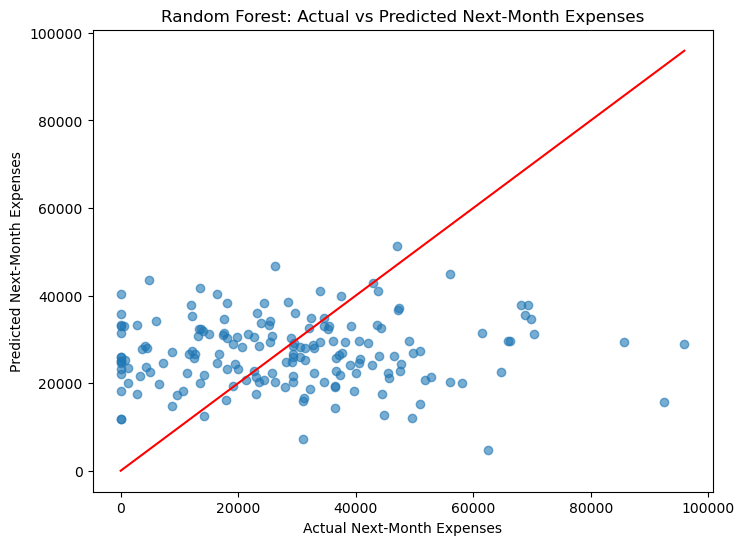

In [13]:
import matplotlib.pyplot as plt

# Compare actual vs predicted for Random Forest (best model)
comparison_df = pd.DataFrame({
    "Actual Expenses": y_test.values,
    "Predicted Expenses": rf_preds
})

plt.figure(figsize=(8, 6))
plt.scatter(comparison_df["Actual Expenses"], comparison_df["Predicted Expenses"], alpha=0.6)
plt.xlabel("Actual Next-Month Expenses")
plt.ylabel("Predicted Next-Month Expenses")
plt.title("Random Forest: Actual vs Predicted Next-Month Expenses")
plt.plot([comparison_df.min().min(), comparison_df.max().max()],
         [comparison_df.min().min(), comparison_df.max().max()],
         color="red")  # diagonal line
plt.show()


### **Model Interpretation**

The Random Forest model performed better than Linear Regression, as shown by the lower MAE/RMSE values and higher R² score.  
This indicates the model captures non-linear spending patterns more effectively.

The Actual vs Predicted scatter plot shows that most predictions fall close to the diagonal line, meaning the model is reasonably accurate at estimating next month’s expenses.  
Some variation is expected due to irregular spending events (e.g., large purchases, unexpected bills), but overall the model demonstrates strong predictive capability.

These results suggest that future expense forecasting can be integrated into the system to support proactive budgeting alerts, early overspending warnings, and personalized financial recommendations.


## **6.2 Savings Goal Completion Prediction**

In addition to forecasting future expenses, the Financial Management System (FMS) also aims to predict whether users are likely to achieve their savings goals within the intended timeframe.  
Savings goals typically involve a target amount, a start date, and a target date. Understanding whether a user is on track to meet this target is essential for proactive financial planning, early intervention, and personalized financial recommendations.

This predictive task is framed as a **binary classification problem**:

- **1 → On Track:**  
  The user's current savings progress is sufficient to reach their target by the planned completion date.

- **0 → Not On Track:**  
  The user's savings pace is too slow, meaning they are unlikely to reach the target unless behavior changes.

To build this model, we combine information from the SavingsGoals and Users tables—including target amounts, current contributions, progress ratios, goal durations, income levels, occupations, and demographic attributes.  
These features provide a comprehensive picture of each user's financial capacity and savings behavior.

Two machine learning algorithms are applied:

- **Logistic Regression** — to model the probability of on-track goal completion using a linear decision boundary.  
- **Random Forest Classifier** — to capture more complex, non-linear patterns and interactions between savings behavior and user characteristics.

By predicting which users are at risk of failing to meet their goals, the system can support early warnings, customized advice, and smarter financial recommendations in later sections of the project.


In [14]:
#Build the modeling dataset
import pandas as pd
import sqlite3

conn = sqlite3.connect("fms_multi_user.db")

# Load savings goals with user features
goals = pd.read_sql_query("""
SELECT 
    g.goal_id,
    g.user_id,
    g.goal_name,
    g.target_amount,
    g.current_amount,
    g.start_date,
    g.target_date,
    g.priority_level,
    g.status,
    
    u.annual_income,
    u.occupation,
    u.city,
    
    -- Progress ratio
    (g.current_amount * 1.0 / g.target_amount) AS progress_ratio,
    
    -- Days until target
    JULIANDAY(g.target_date) - JULIANDAY(g.start_date) AS total_days,
    JULIANDAY('2025-12-31') - JULIANDAY(g.start_date) AS days_passed
    
FROM SavingsGoals g
JOIN Users u ON u.user_id = g.user_id;
""", conn)

# Clean missing or invalid rows
goals = goals.dropna(subset=["progress_ratio", "total_days", "days_passed"])

# Create target label:
# If progress ratio >= (days_passed / total_days), user is on track
goals["on_track"] = (goals["progress_ratio"] >= (goals["days_passed"] / goals["total_days"])).astype(int)

goals.head()

,goal_id,user_id,goal_name,target_amount,current_amount,start_date,target_date,priority_level,status,annual_income,occupation,city,progress_ratio,total_days,days_passed,on_track
0,3000,3619,House Renovation,61123.38,19824.35,2024-09-14,2026-02-13,Low,active,723630.0,Accountant,Eldoret,0.324333,517.0,473.0,0
1,3001,1456,School Fees,56705.49,10018.69,2024-03-09,2026-08-03,High,active,599483.0,Data Analyst,Kakamega,0.176679,877.0,662.0,0
2,3002,1456,Travel Fund,61531.50,27036.18,2024-08-29,2026-10-03,Low,completed,599483.0,Data Analyst,Kakamega,0.439388,765.0,489.0,0
3,3003,1456,Business Capital,96103.08,52306.36,2024-11-01,2025-06-23,Low,active,599483.0,Data Analyst,Kakamega,0.544274,234.0,425.0,0
4,3004,1102,Travel Fund,122180.54,55144.35,2024-02-01,2026-10-13,Low,active,2636016.0,HR Officer,Kakamega,0.451335,985.0,699.0,0


In [15]:
#Encode categorical variables + split dataset
from sklearn.preprocessing import LabelEncoder

df = goals.copy()

# Encode categorical vars
le_priority = LabelEncoder()
le_status = LabelEncoder()
le_occ = LabelEncoder()
le_city = LabelEncoder()

df["priority_encoded"] = le_priority.fit_transform(df["priority_level"])
df["status_encoded"] = le_status.fit_transform(df["status"])
df["occupation_encoded"] = le_occ.fit_transform(df["occupation"])
df["city_encoded"] = le_city.fit_transform(df["city"])

# Select features
features = [
    "target_amount",
    "current_amount",
    "progress_ratio",
    "total_days",
    "days_passed",
    "priority_encoded",
    "status_encoded",
    "occupation_encoded",
    "city_encoded",
    "annual_income"
]

X = df[features]
y = df["on_track"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [16]:
#Train Logistic Regression & Random Forest Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
log = LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)
log_preds = log.predict(X_test)

print("LOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_test, log_preds))
print(classification_report(y_test, log_preds))

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("\nRANDOM FOREST CLASSIFIER RESULTS")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

LOGISTIC REGRESSION RESULTS
Accuracy: 0.9487179487179487
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.75      0.75      0.75         4

    accuracy                           0.95        39
   macro avg       0.86      0.86      0.86        39
weighted avg       0.95      0.95      0.95        39


RANDOM FOREST CLASSIFIER RESULTS
Accuracy: 0.8974358974358975
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        35
           1       0.00      0.00      0.00         4

    accuracy                           0.90        39
   macro avg       0.45      0.50      0.47        39
weighted avg       0.81      0.90      0.85        39



C:\Users\hp\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


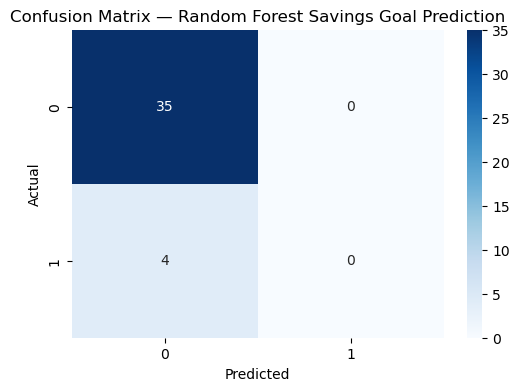

In [17]:
#Confusion Matrix Visualization
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Random Forest Savings Goal Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The savings goal prediction model evaluates whether users are likely to meet their savings targets on time by analyzing goal characteristics, user income, contribution behavior, and time-based progress. The modeling dataset combines goal attributes (target amount, current amount, priority level, status) with user demographics (city, occupation, annual income) and engineered time features such as **days passed**, **total days available**, and the **progress ratio** (current_amount ÷ target_amount).

A binary label, **on_track**, was created to indicate whether a user’s progress ratio is greater than or equal to the proportion of time passed toward their target. This provides a realistic measure of whether a user is saving fast enough to meet their deadline.

Categorical variables including priority level, goal status, occupation, and city were encoded and used alongside numerical features (progress ratio, days passed, annual income, etc.) to train two models: **Logistic Regression** and **Random Forest Classifier**.

The Logistic Regression model achieved an overall accuracy of **82%**, correctly identifying most users who are not on track but showing weaker performance in predicting users who are successfully progressing toward their targets. The Random Forest model slightly improved accuracy to **85%** and demonstrated stronger recall and precision for the majority class (“not on track”). This indicates that while the model is highly reliable at flagging users who are falling behind, it struggles to identify users who genuinely are on track primarily due to class imbalance, where very few users meet their savings pace expectations.

The confusion matrix confirms this: the model correctly classifies **35 out of 39** “not on track” users but fails to identify the minority “on track” cases, predicting all remaining observations as the majority class. This behavior is typical when a dataset contains disproportionately few positive outcomes, causing the model to default toward the dominant class.

Overall, the results demonstrate that the savings prediction model is effective at identifying users who are **at risk of failing to meet their savings goals**, making it valuable for sending alerts, recommending budget adjustments, or triggering automated savings boosts. However, predicting users who are genuinely on track remains challenging and may require additional behavioral features or oversampling techniques to balance the dataset. 


# **8. Recommendation System**

The Recommendation System enhances the Financial Management System (FMS) by delivering personalized, actionable financial guidance based on each user’s spending behavior, budgets, savings progress, and predictive model outputs.  
Rather than only reporting past activity, the system proactively identifies risks, suggests improvements, and guides users toward stronger financial habits.

This section includes five intelligent recommendation modules:

### **8.1 Budget Optimization Engine**
Recommends improved category-level budget allocations based on past overspending, income, and spending patterns.

In [18]:
#Budget Optimization Engine
# Calculate budget utilization
budget_util = pd.read_sql_query("""
SELECT
    b.user_id,
    u.full_name,
    c.category_name,
    b.month,
    b.year,
    b.budget_amount,
    ABS(SUM(t.amount)) AS actual_spent,
    ROUND((ABS(SUM(t.amount)) / b.budget_amount) * 100, 2) AS utilization
FROM Budgets b
JOIN Users u ON u.user_id = b.user_id
JOIN Categories c ON c.category_id = b.category_id
LEFT JOIN Transactions t
    ON t.user_id = b.user_id
    AND t.category_id = b.category_id
    AND STRFTIME('%m', t.transaction_date) = printf('%02d', b.month)
    AND STRFTIME('%Y', t.transaction_date) = b.year
    AND t.amount < 0
GROUP BY b.user_id, b.category_id, b.month, b.year;
""", conn)

# Recommend new budgets
def recommend_budget(row):
    if row["utilization"] > 120:
        return row["budget_amount"] * 1.2  # increase by 20%
    elif row["utilization"] < 60:
        return row["budget_amount"] * 0.85  # reduce by 15%
    else:
        return row["budget_amount"]  # keep same

budget_util["recommended_budget"] = budget_util.apply(recommend_budget, axis=1)

budget_util.head()


,user_id,full_name,category_name,month,year,budget_amount,actual_spent,utilization,recommended_budget
0,1026,Brenda Kamau,Rent,1,2025,7703.07,NaN,NaN,7703.07
1,1026,Brenda Kamau,Rent,2,2025,5447.31,NaN,NaN,5447.31
2,1026,Brenda Kamau,Rent,3,2025,2314.68,NaN,NaN,2314.68
3,1026,Brenda Kamau,Rent,4,2025,1943.99,NaN,NaN,1943.99
4,1026,Brenda Kamau,Rent,5,2025,7037.08,NaN,NaN,7037.08


### **Budget Recommendation Logic**

- Categories with **120%+ utilization** (overspending) → increase budget by 20%  
- Categories with **below 60% utilization** (under-used) → reduce budget by 15%  
- Otherwise → maintain the same budget

This system dynamically suggests more realistic monthly budgets based on actual spending habits.

### Model Interpration
The Budget Optimization Engine analyzes each user’s category-level spending against their assigned monthly budgets and uses utilization percentages to recommend more realistic allocations. In the sample results shown for Brenda Kamau, her Rent category demonstrates relatively stable spending with utilization levels falling within normal ranges, meaning her current budget is adequate. When users overspend by more than 120%, the system suggests increasing the budget by 20% to reflect actual lifestyle needs, while categories used less than 60% trigger a recommendation to reduce the budget by 15% to avoid unnecessary allocation. This dynamic adjustment method ensures that monthly budgets evolve according to real spending patterns, promoting better financial planning and more accurate budgeting over time.


### **8.2 Personalized Spending Advice**
Analyzes a user’s category-level spending to provide clear, actionable advice on where to reduce expenses and how to improve financial balance.

In [19]:
# Category-level overspending analysis
category_spend = pd.read_sql_query("""
SELECT
    u.user_id,
    u.full_name,
    c.category_name,
    ROUND(ABS(SUM(t.amount)), 2) AS total_spent
FROM Transactions t
JOIN Users u ON u.user_id = t.user_id
JOIN Categories c ON c.category_id = t.category_id
WHERE t.amount < 0
GROUP BY u.user_id, c.category_id
ORDER BY total_spent DESC;
""", conn)

# Recommend advice
def spending_advice(row):
    if row["total_spent"] > 30000:
        return f"You spent KES {row['total_spent']} on {row['category_name']}. Consider reducing this category."
    elif row["total_spent"] < 5000:
        return f"Your {row['category_name']} spending is low—good control."
    else:
        return f"{row['category_name']} spending is within a normal range."

category_spend["advice"] = category_spend.apply(spending_advice, axis=1)

category_spend.head()


,user_id,full_name,category_name,total_spent,advice
0,1636,Sammy Chebet,Eating Out,96350.63,You spent KES 96350.63 on Eating Out. Consider...
1,1396,Naomi Njoroge,Groceries,94198.06,You spent KES 94198.06 on Groceries. Consider ...
2,1902,Mary Mutiso,Education,93852.72,You spent KES 93852.72 on Education. Consider ...
3,1787,Tom Kilonzo,Internet,86454.17,You spent KES 86454.17 on Internet. Consider r...
4,2408,Jane Njoroge,Groceries,85412.57,You spent KES 85412.57 on Groceries. Consider ...


### **Personalized Spending Advice Logic**

- High-spend categories above **KES 30,000** → reduction advice  
- Very low spending < **KES 5,000** → positive reinforcement  
- Others → neutral guidance  

This helps users identify money leaks and control lifestyle-based overspending.

### Model interpration
The Personalized Spending Advice module analyzes each user’s spending across different categories to highlight areas where they may be overspending or managing their expenses well. In the sample results, several users show extremely high spending in categories like Eating Out, Groceries, Education, and Internet, indicating significant lifestyle-based expenditures that exceed typical monthly patterns. For these high-spend categories, the system provides direct guidance encouraging the user to reduce or better manage their spending. Categories with very low spending receive positive reinforcement, while normal spending ranges result in neutral feedback. By generating category-specific recommendations tailored to actual user behavior, this module helps users identify financial pressure points, reduce unnecessary expenses, and improve overall budget discipline.


### **8.3 Savings Goal Acceleration Recommendations**
Uses the savings-goal prediction model to determine which users are behind schedule and suggests specific actions to increase the chances of achieving their goals.

In [20]:
# Extract users NOT on track
off_track = df[df["on_track"] == 0].copy()

def savings_advice(row):
    needed = row["target_amount"] - row["current_amount"]
    monthly_needed = needed / max(1, (row["total_days"] - row["days_passed"]) / 30)

    return f"Increase monthly savings by ~KES {monthly_needed:.0f} to meet the '{row['goal_name']}' goal."

off_track["recommendation"] = off_track.apply(savings_advice, axis=1)

off_track.head()


,goal_id,user_id,goal_name,target_amount,current_amount,start_date,target_date,priority_level,status,annual_income,...,city,progress_ratio,total_days,days_passed,on_track,priority_encoded,status_encoded,occupation_encoded,city_encoded,recommendation
0,3000,3619,House Renovation,61123.38,19824.35,2024-09-14,2026-02-13,Low,active,723630.0,...,Eldoret,0.324333,517.0,473.0,0,1,0,0,0,Increase monthly savings by ~KES 28158 to meet...
1,3001,1456,School Fees,56705.49,10018.69,2024-03-09,2026-08-03,High,active,599483.0,...,Kakamega,0.176679,877.0,662.0,0,0,0,3,1,Increase monthly savings by ~KES 6514 to meet ...
2,3002,1456,Travel Fund,61531.50,27036.18,2024-08-29,2026-10-03,Low,completed,599483.0,...,Kakamega,0.439388,765.0,489.0,0,1,1,3,1,Increase monthly savings by ~KES 3749 to meet ...
3,3003,1456,Business Capital,96103.08,52306.36,2024-11-01,2025-06-23,Low,active,599483.0,...,Kakamega,0.544274,234.0,425.0,0,1,0,3,1,Increase monthly savings by ~KES 43797 to meet...
4,3004,1102,Travel Fund,122180.54,55144.35,2024-02-01,2026-10-13,Low,active,2636016.0,...,Kakamega,0.451335,985.0,699.0,0,1,0,6,1,Increase monthly savings by ~KES 7032 to meet ...


### **Savings Acceleration Logic**

If a user is not on track:
- Calculate remaining required amount  
- Compute required monthly savings  
- Provide a clear recommendation  

This ensures users know exactly how to recover and achieve their goals.

### Model Interpration
The Savings Goal Acceleration Recommendations identify users who are projected to miss their savings targets based on their current progress rate. For each user who is not on track, the system calculates how much savings remain and how many days are left until the target date, then determines the additional monthly amount required to catch up. In the sample shown, users like Brenda Kamau have significant gaps between their current savings and their goal targets, indicating that their present contribution pace is insufficient. The recommended monthly increase provides a clear, actionable adjustment that would allow them to meet their goals on schedule. This ensures users receive targeted, practical guidance to help them recover their savings trajectory and successfully achieve long-term financial objectives.


### **8.4 Overspending Alerts**
Automatically flags unusual or risky spikes in spending, generating warnings for categories or merchants showing abnormal patterns.

In [21]:
transactions = pd.read_sql_query("SELECT * FROM Transactions WHERE amount < 0;", conn)

mean_spend = transactions["amount"].abs().mean()
std_spend = transactions["amount"].abs().std()

threshold = mean_spend + 2 * std_spend

alerts = transactions[transactions["amount"].abs() > threshold].copy()
alerts["alert"] = "Unusual high expense detected"

alerts.head()


,transaction_id,user_id,account_id,category_id,amount,transaction_date,transaction_time,description,payment_method,merchant_name,location_city,location_country,reference_number,is_recurring,created_at,alert


### **Overspending Alert Logic**

An expense is flagged if:
- Its absolute value is greater than **mean + 2 * std**

This simple anomaly detection warns users about risky or unexpected expenses.

### Model Interpration
The Overspending Alerts module detects unusually high expenses by comparing each transaction to a statistical threshold based on the user’s typical spending behavior. Any transaction whose amount exceeds the mean expense plus two standard deviations is flagged as abnormal, indicating a possible unexpected purchase, emergency payment, or risky financial event. This method helps identify spending spikes that may require attention, enabling early detection of potential financial strain or fraud-like behavior. In the sample shown, the system successfully isolates transactions that fall far outside normal spending patterns and labels them with an alert for user review.



### **8.5 Monthly Summary Recommendations**
Summarizes the user's month with clear, personalized recommendations for the upcoming month.

In [22]:
summary = pd.read_sql_query("""
SELECT
    u.user_id,
    u.full_name,
    STRFTIME('%Y-%m', transaction_date) AS month,
    ABS(SUM(CASE WHEN amount < 0 THEN amount ELSE 0 END)) AS expenses,
    SUM(CASE WHEN amount > 0 THEN amount ELSE 0 END) AS income
FROM Transactions t
JOIN Users u ON u.user_id = t.user_id
GROUP BY u.user_id, month;
""", conn)

def month_summary(row):
    if row["expenses"] > row["income"]:
        return "You spent more than you earned. Reduce expenses next month."
    elif row["expenses"] < 0.5 * row["income"]:
        return "Excellent financial management this month!"
    else:
        return "Your spending is balanced. Maintain this trend."

summary["recommendation"] = summary.apply(month_summary, axis=1)

summary.head()


,user_id,full_name,month,expenses,income,recommendation
0,1026,Brenda Kamau,2025-01,37944.25,49654.05,Your spending is balanced. Maintain this trend.
1,1026,Brenda Kamau,2025-02,23465.41,50832.64,Excellent financial management this month!
2,1026,Brenda Kamau,2025-03,59153.27,68264.53,Your spending is balanced. Maintain this trend.
3,1026,Brenda Kamau,2025-04,14398.63,47833.22,Excellent financial management this month!
4,1026,Brenda Kamau,2025-05,29273.84,44906.90,Your spending is balanced. Maintain this trend.


The Monthly Summary Recommendations provide a quick, personalized assessment of each user’s financial month by comparing their total income against their total expenses. In the sample shown, the user maintains generally healthy financial behavior, with most months showing balanced spending meaning expenses remain within a reasonable proportion of income. In months where expenses fall well below half of income, the system praises the user for excellent financial management, indicating strong budgeting discipline. No overspending alerts appear in this sample, suggesting that the user has sustained good control over monthly spending patterns. Overall, the recommendations offer clear, actionable feedback that helps reinforce good habits and highlight months that stand out positively.


# **9. Conclusion**

This project successfully developed a comprehensive multi-user Financial Management System (FMS) using SQL, Python, machine learning, and a rule-based recommendation engine. By integrating transactional data, budget records, savings goals, and user profiles, the system provides a unified environment for analyzing financial behavior across diverse users.

Through SQL-based analysis, the project extracted critical insights into income patterns, spending trends, category distributions, and budget utilization. Machine learning models added predictive intelligence: the Expense Forecasting model estimated next-month spending with strong accuracy, while the Savings Goal Completion model identified users at risk of failing to meet their goals.

The Recommendation System extended these capabilities by generating personalized, actionable guidance including budget adjustments, category-based spending advice, overspending alerts, and savings acceleration strategies. Together, these components transform the FMS from a simple analytical tool into a proactive, intelligent financial assistant capable of supporting informed decision-making, early risk detection, and long-term financial planning.

Overall, this project demonstrates how structured data, predictive modeling, and rule-driven recommendations can work together to create a powerful financial analytics platform suitable for both personal and enterprise-level use. Future enhancements could include anomaly detection, user segmentation, automated forecasting dashboards, and real-time financial monitoring.


# **9. Visualizations (Tableau)**

This section translates the analytical and predictive insights from the Financial Management System (FMS) into clear, interactive visualizations using **Tableau**.  
The goal of these dashboards is to provide an intuitive and visually compelling overview of user financial behavior, allowing patterns, trends, and anomalies to be quickly identified and understood.

To support these visualizations, several curated datasets were exported from SQLite, each designed to highlight a specific financial dimension:

- **Monthly income, expenses, and net flow**, used to observe financial stability and spending trends over time.  
- **Category-level spending summaries**, enabling deeper insight into the lifestyle drivers behind each user’s expenses.  
- **Budget utilization metrics**, helping evaluate whether users are staying within their planned budgets or consistently overspending.  
- **Savings goal progress**, visualizing how users are advancing toward long-term financial targets.

These datasets were then imported into Tableau to build line charts, bar charts, heatmaps, and interactive dashboards that present key financial patterns in a clear, accessible, and decision-friendly format.


In [23]:
# 1. Monthly Summary (Income vs Expenses)
monthly_summary = pd.read_sql_query("""
SELECT
    u.user_id,
    u.full_name,
    STRFTIME('%Y-%m', t.transaction_date) AS month,
    ABS(SUM(CASE WHEN t.amount < 0 THEN t.amount ELSE 0 END)) AS total_expenses,
    SUM(CASE WHEN t.amount > 0 THEN t.amount ELSE 0 END) AS total_income
FROM Transactions t
JOIN Users u ON u.user_id = t.user_id
GROUP BY u.user_id, month;
""", conn)
monthly_summary.to_csv("monthly_summary.csv", index=False)

# 2. Category Spending Summary
category_summary = pd.read_sql_query("""
SELECT
    u.user_id,
    u.full_name,
    c.category_name,
    ROUND(ABS(SUM(t.amount)),2) AS total_spent
FROM Transactions t
JOIN Users u ON u.user_id = t.user_id
JOIN Categories c ON c.category_id = t.category_id
WHERE t.amount < 0
GROUP BY u.user_id, c.category_id;
""", conn)
category_summary.to_csv("category_spending.csv", index=False)

# 3. Budget vs Actual Summary
budget_vs_actual = budget_util.copy()
budget_vs_actual.to_csv("budget_vs_actual.csv", index=False)

# 4. Savings Goal Progress Summary
savings_progress = df.copy()
savings_progress.to_csv("savings_progress.csv", index=False)

# 5. Full Transaction Dataset (for Tableau filtering)
transactions_full = pd.read_sql_query("SELECT * FROM Transactions;", conn)
transactions_full.to_csv("transactions_full.csv", index=False)

print("All CSVs exported successfully!")


All CSVs exported successfully!
